In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),10.0,Harmful Effects,Excessive Alcohol Use,Overall,65+
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),54.0,Harmful Effects,Excessive Alcohol Use,Overall,50-64
2,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Overall,35-49
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,115.0,Harmful Effects,Excessive Alcohol Use,Overall,20-34
4,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,23.0,Harmful Effects,Excessive Alcohol Use,Overall,0-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcohol abuse,12.0,Harmful Effects,Any Alcohol Use,Overall,50-64
4123,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,14.0,Harmful Effects,Any Alcohol Use,Overall,65+
4124,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,24.0,Harmful Effects,Any Alcohol Use,Overall,35-49
4125,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,43.0,Harmful Effects,Any Alcohol Use,Overall,50-64


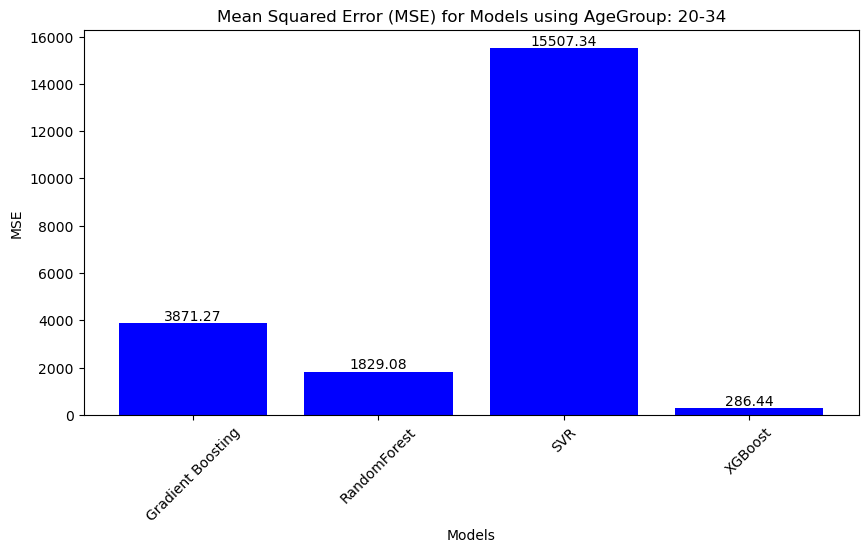

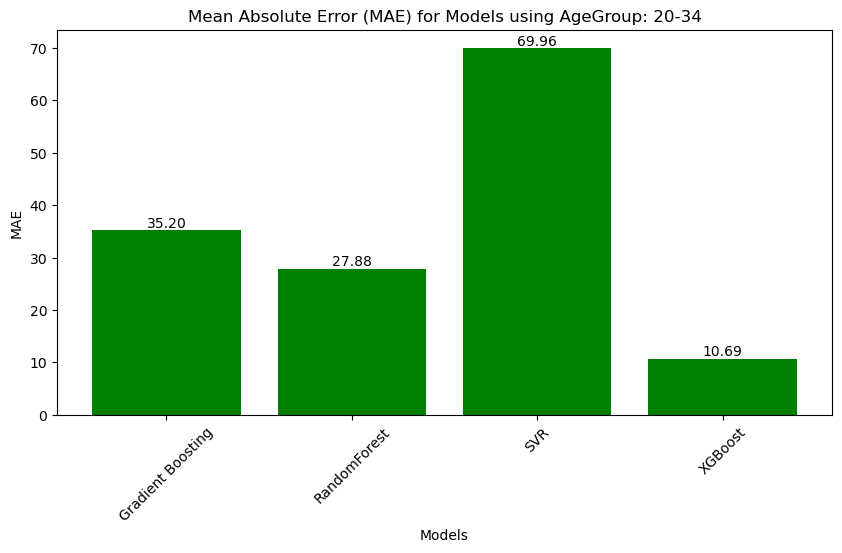

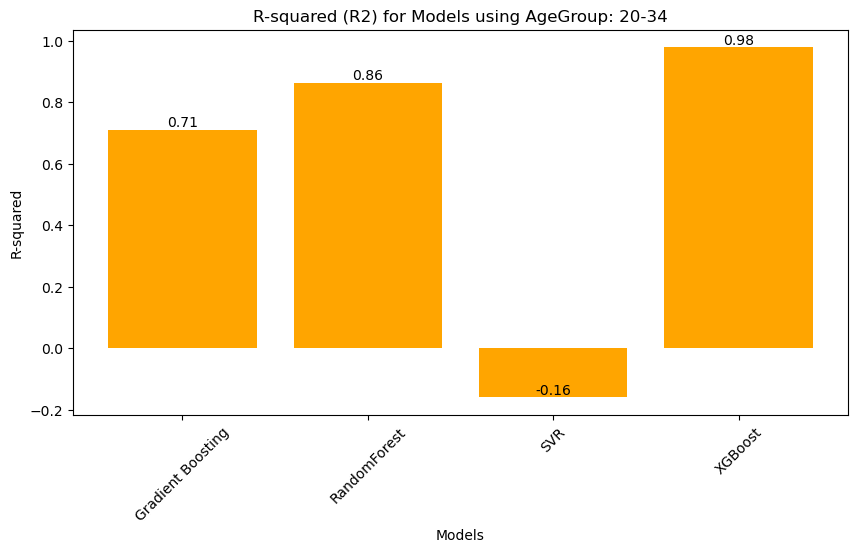

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def predict_with_models(ardi_data, age_group):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by age group
    filtered_data = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'Category', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using AgeGroup: {age_group}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the age group for filtering
age_group = '20-34'

# Perform prediction with models for the specified age group
predict_with_models(ardi_data, age_group)


In [3]:
# Age based 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using SVR
def predict_by_agegroup_svr(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     model = SVR(kernel='rbf')  # Using RBF kernel for SVR
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on AgeGroup
age_group = '20-34'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_agegroup_svr(age_group)
print(f"SVR Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for '20-34': [63.88768995 51.77053698 58.77662009 72.54398897 61.4432649  46.67812327
 53.88776929 55.10384387 56.01138255 57.22107687 55.7891621  53.66554953
 58.10995801 47.78922487 63.88769065 72.09954874 47.56700511 50.08401267
 71.43288737 79.65504366 57.54826892 59.32603259 61.66548605 48.90032717
 59.32603328 77.43283906 61.22104514 55.10384456 50.88165514 60.33216261
 54.55443067 56.5544148  56.99885642 59.99269397 58.43715145 53.32608019
 59.10381213 61.22104444 50.88165584 75.65507609 56.45582278 60.65935604
 63.44324903 55.9927257  61.4432656  53.54830065 48.67810671 47.56700442
 15.67809084 53.10386043 50.45587108 54.43718249 58.21493029 61.10379696
 59.22106101 70.32178438 58.55439893]
Mean Squared Error (MSE): 15507.339630782424
Mean Absolute Error (MAE): 69.95771479731461
R-squared (R2): -0.15933604739266571


In [10]:
# Age based 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']   # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Gradient Boosting
def predict_by_agegroup_gb(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    gb_mse = mean_squared_error(y_test, y_pred)
    gb_mae = mean_absolute_error(y_test, y_pred)
    gb_r2 = r2_score(y_test, y_pred)
    
    return y_pred, gb_mse, gb_mae, gb_r2

# Example prediction using Gradient Boosting based on AgeGroup
age_group = '20-34'

prediction, gb_mse, gb_mae, gb_r2 = predict_by_agegroup_gb(age_group)
print(f"Gradient Boosting Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


Gradient Boosting Predicted values for '20-34': [ 33.08525598 329.31079299  69.31142824  54.16755485  60.44679163
  84.67351119  77.25979368  52.48987363  67.46360612  62.98634759
  52.42406348  74.88358769  48.3485374  253.36708124  33.08525598
 118.57969526  42.59069459  20.71761402  35.1060451  286.15616151
  68.99276333 253.35480111  60.44679163 203.98187682 253.35480111
  59.1763773   84.33218145  52.48987363  74.88358769  64.8514271
 329.31079299  92.77443692 139.91463542  57.18161234  88.47351768
  88.96556734 133.04449109  84.33218145  74.88358769  55.64038474
 352.57204725  64.71859263  69.29399482  73.45276447  60.44679163
 113.44893243 114.88151726  42.59069459  16.89103606  88.96556734
  56.40961739  59.40896038  82.79318608  32.16483505  69.31142824
  72.77785311  76.3679429 ]
Mean Squared Error (MSE): 3871.274877017907
Mean Absolute Error (MAE): 35.198319568958155
R-squared (R2): 0.710581658675775


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']   # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using XGBoost
def predict_by_agegroup_xgb(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on AgeGroup
age_group = '20-34'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_agegroup_xgb(age_group)
print(f"XGBoost Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for '20-34': [ 24.64574  312.4097    61.611233  47.895687  51.489185  59.771618
  96.01066   10.526656  83.85373   51.983788  33.85267   86.535965
  25.827991 226.11739   24.703472 108.96719   14.326768  16.611403
  12.777008 247.48189   51.533504 275.07126   17.768988 445.70627
 272.2244    70.49164  105.391556  10.785016  75.008125  64.7701
 596.6226    22.93432  142.16933   22.904593 207.83481   50.105827
 174.09651  108.57653   73.6759    84.40535  336.06326   46.883366
  52.322712  78.884605  51.702328 151.70876   33.15357   20.416714
  12.987014  26.012943  42.729332  44.65316  132.67459   12.934492
 112.06666   72.198746 106.014626]
Mean Squared Error (MSE): 286.43952907203123
Mean Absolute Error (MAE): 10.691434425220155
R-squared (R2): 0.9785856452906855


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']   # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Random Forest
def predict_by_agegroup_rf(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on AgeGroup
age_group = '20-34'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_agegroup_rf(age_group)
print(f"Random Forest Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for '20-34': [ 61.45 290.26  71.09  61.72  34.49  53.22  86.59  21.26  81.57  54.05
  49.58  87.29  24.72 243.86  63.53 106.54  44.84  32.2   25.68 316.63
  53.71 262.3   41.72 329.81 253.32  71.58  91.7   19.29  84.56  58.55
 373.84  60.52 147.18  28.51 158.84  60.17 169.99  90.62  86.01  80.29
 386.01  52.4   56.16  67.91  37.04 136.31 155.07  43.84  15.34  48.77
  77.12  57.37 105.56  46.55  96.03  74.2   87.58]
Mean Squared Error (MSE): 2330.1594491228075
Mean Absolute Error (MAE): 27.752280701754387
R-squared (R2): 0.8257961771741755


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']   # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on AgeGroup using Linear Regression
def predict_by_agegroup_linear(age_group):
    df_filtered = ardi_data[ardi_data['AgeGroup'] == age_group]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Using Linear Regression for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using Linear Regression based on AgeGroup
age_group = '20-34'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_agegroup_linear(age_group)
print(f"Linear Regression Predicted values for '{age_group}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for '20-34': [ 96.68841391  60.75567489  97.7121989   84.57261425  90.52363965
 101.56882381  71.46888286  69.16218523 125.10705279  93.78916074
 124.54661876  84.82221636  82.1171293   90.4572264  110.60218143
  97.36551373 103.81055991  59.47329559  95.68421166 102.50650299
  75.32695949  79.81043167 104.9978412   93.25939652  93.7241992
  96.90216276 103.87697315  83.07595276  58.51393879  87.72146953
  73.15018493  78.19409114  93.22872671  81.49173374  91.48246311
  64.67871305  79.24999765  89.96320563  72.42770632 106.3324581
 112.31415331  97.08680334  95.56754586  71.40392133 104.43740718
  65.23914707  92.6989625   89.89679238  37.20304662  78.03204655
 111.09620221  67.48088316  77.00826156  98.20767139  98.83306694
  78.96827402  83.23799735]
Mean Squared Error (MSE): 13926.731405335542
Mean Absolute Error (MAE): 76.54707083093818
R-squared (R2): -0.041169028665065444


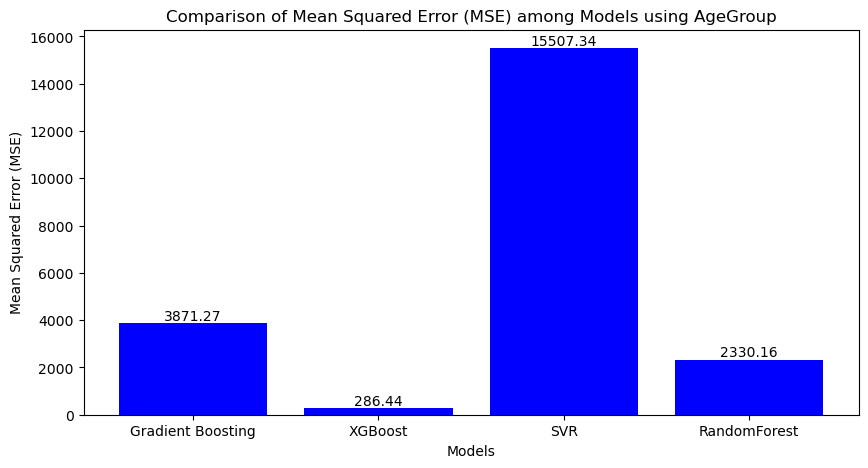

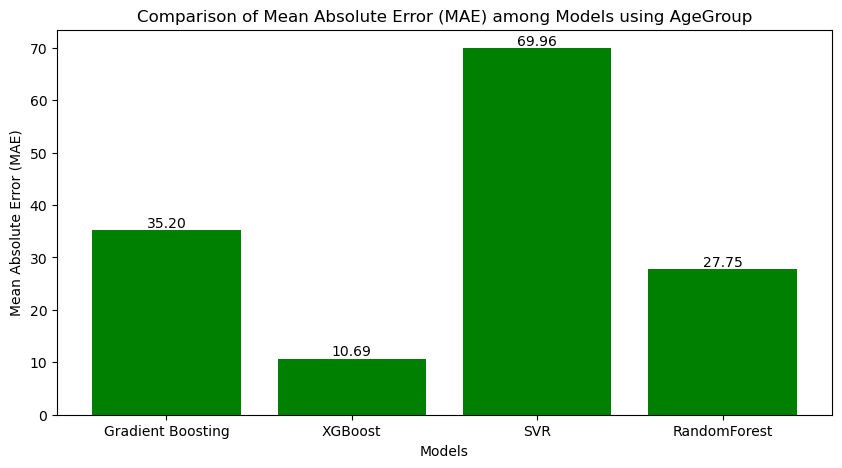

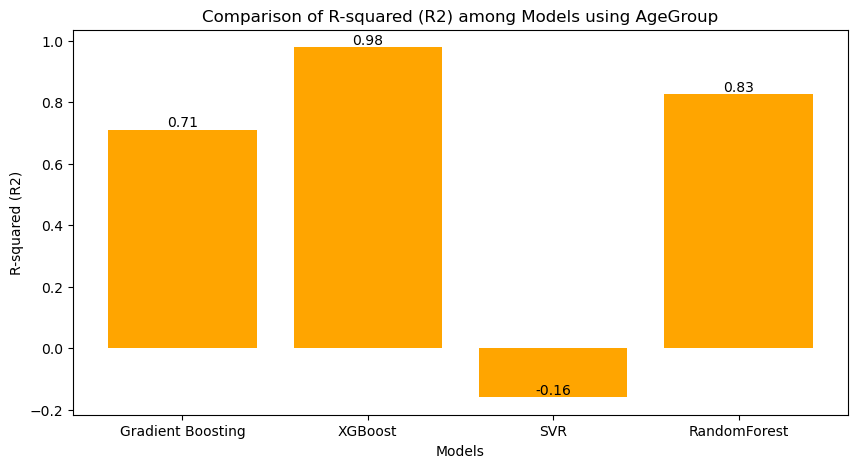

In [11]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Gradient Boosting', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [gb_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [gb_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [gb_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using AgeGroup')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using AgeGroup')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using AgeGroup')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

